Price response curve is logit : C* exp-(a +bp) / 1 + exp-(a +bp).  
Objective is to find the estimate for the parameters C, a, b.  
Subsequent to which we find the optimal price which maximises the profit function.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize

In [2]:
## Create a data frame with price and demand 

price = [14,17,18,19,22]
demand = [461, 493, 469, 339, 60]
data = pd.DataFrame({"price" : price , "demand" : demand})

In [3]:
def cal_demand(x):
    """
    Calculate demand value  where price response function is logit. 
    """
    C = x[0]
    a = x[1]
    b = x[2]
    p = x[3]
    index = -(a + b*p)
    demand = C*(np.exp(index)/(1 + np.exp(index)))
    return demand

In [4]:
def square_error(actual, x):
    """
    Calculate square difference betweehn y_hat and y.
    """
    diff = (actual - cal_demand(x))**2
    return diff

In [5]:
def objective(x):
    """
    For each price value in the data file, calculate the predicted demand value(y_hat) and
    find the RMSE.
    Objective is to have the least RMSE .
    """
    total_sq_error = 0
    
    for i in range(data.shape[0]):
        x = np.append(x,data.iloc[i]['price'])
        actual = data.iloc[i]['demand']
        total_sq_error = total_sq_error +  square_error(actual , x)
        x = np.delete(x, 3)
    
    
    return np.sqrt(total_sq_error/data.shape[0])

In [6]:
bounds = ((0,500),(0,np.inf),(-np.inf,np.inf))
cons = ({"type" : "ineq" })
## Initial guess for C , a , b
C_i = 500
a_i = 1
b_i = 1
x_i = np.array([C_i, a_i , b_i])

In [7]:
soln = minimize(objective, x_i, method = 'Nelder-Mead', bounds = bounds ,  options = {"disp":True})


C:\Users\Anusha\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:430: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)


Optimization terminated successfully.
         Current function value: 24.103528
         Iterations: 279
         Function evaluations: 499


In [8]:
parameters = soln.x
min_rmse = soln.fun

In [10]:
print("\n C : {}".format(parameters[0]))
print("a {}".format(parameters[1]))
print("b :{}".format(parameters[2]))
print("\n RMSE :{}".format(min_rmse))



 C : 490.6166189301976
a -22.30928334849426
b :1.119135822492614

 RMSE :24.10352840956486


Note : Excercise done with Excel too gave the same values as above.

In [11]:
## Print the actual and predicted 
def predict(x):
    predicted = []
    for i in range(data.shape[0]):
        x = np.append(x,data.iloc[i]['price'])
        predicted.append(cal_demand(x))
        x = np.delete(x,3)
    return predicted

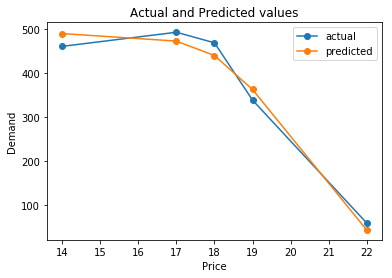

In [12]:
predicted = predict(parameters)
plt.plot(data['price'], data['demand'], '-o', label = 'actual')
plt.plot(data['price'], predicted ,'-o', label = 'predicted')
plt.title("Actual and Predicted values")
plt.xlabel("Price")
plt.ylabel("Demand")
plt.legend()
plt.show()

Optimize the profit function with the estimated parameters C, a, b for the logit price response function and find the optimal price.  
Let the cost be 5.   
Maximise (p-c)d(p) to get the optimal price 

In [13]:
def cal_profit(p):
    c = 5
    C = parameters[0]
    a = parameters[1]
    b = parameters[2]
    index = -(a + b*p)
    d_p = C*(np.exp(index)/(1 + np.exp(index)))
    profit = (p-c)*d_p
    return profit
    

In [14]:
bounds = ((0,np.inf))
cons = ({"type" : "ineq" })
## Initial guess for p
p_i = np.array([10])
#
def objective(p):
    return - cal_profit(p)
#
soln = minimize(objective, p_i, method = 'SLSQP' ,  options = {"disp":True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -5759.5910368845
            Iterations: 7
            Function evaluations: 33
            Gradient evaluations: 7


In [15]:
opt_price = np.round(soln.x,decimals = 2)
max_profit = soln.fun

In [16]:
print("\n optimal price :{}".format(opt_price[0]))
print("Max profit :{}".format(-max_profit))


 optimal price :17.63
Max profit :5759.5910368845


In [17]:
## Demand at optimal price :
C = parameters[0]
a = parameters[1]
b = parameters[2]
index = -(a + b*opt_price[0])
demand_opt = np.round(C*(np.exp(index)/(1 + np.exp(index))),2)
print("Demand at opt price: {}".format(demand_opt))

Demand at opt price: 456.02


In [19]:
## Elasticity 
c= 5
elasticity = (opt_price[0]) / ( opt_price[0] -c)
print("Elasticity at opt price : {}".format(np.round(elasticity,2)))

Elasticity at opt price : 1.4
